
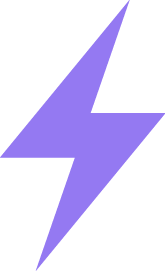

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [2]:
df = pd.read_csv('uscamex.csv')
df.head()

Name State/Estado/Province     Country  \
0  Panama City                Panamá      Panama   
1     San Jose              San Jose  Costa Rica   
2       Masaya                Masaya   Nicaragua   
3      Managua               Managua   Nicaragua   
4         Leon                  Leon   Nicaragua   

   Distance to closest larger city (KM) 60 cities Region 190 km  \
0                                   NaN                     NaN   
1                                   NaN                     NaN   
2                                   NaN                     NaN   
3                                   NaN                     NaN   
4                                   NaN                     NaN   

  60 cities Region 380 km 60 cities Region 475 km 100 cities Region 190 km  \
0                     NaN                     NaN                      NaN   
1                     NaN                     NaN                      NaN   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   
4                     NaN                     NaN                      NaN   

   Population Rank Rank Power           ...           Current AMTRAK service?  \
0               50          0           ...                               NaN   
1               41          0           ...                               NaN   
2              325          0           ...                               NaN   
3               64          0           ...                               NaN   
4              180          0           ...                               NaN   

  Score Rank Population PSA Rank Number of Routes  Number of trains  \
0        NaN                 NaN              NaN               NaN   
1        NaN                 NaN              NaN               NaN   
2        NaN                 NaN              NaN               NaN   
3        NaN                 NaN              NaN               NaN   
4        NaN                 NaN              NaN               NaN   

   Missing railroad?  Note Latitude  Longitude  Population city proper  
0                NaN   NaN     9.00      79.15                     NaN  
1                NaN   NaN     9.90      84.10                     NaN  
2                NaN   NaN    12.00      86.10                     NaN  
3                NaN   NaN    12.15      86.25                     NaN  
4                NaN   NaN    12.45      86.90                     NaN  

[5 rows x 35 columns]

In [3]:
df.isnull().sum()

Name                                                         0
State/Estado/Province                                        0
Country                                                      1
Distance to closest larger city (KM)                        71
60 cities Region 190 km                                    440
60 cities Region 380 km                                    442
60 cities Region 475 km                                    391
100 cities Region 190 km                                   358
Population Rank                                              0
Rank Power                                                   0
Population                                                   0
Population PSAPower                                          0
Rolling population total                                     0
Rolling Population Percent                                   0
Politics 1 for Democrat, -1 for Republican, 2 for swing    219
Governor party D+ R-                                   

In [4]:
df['Longitude'] = df['Longitude'] * -1
X = df[['Latitude','Longitude']]
x = df['Latitude']
y = df['Longitude']
labels = df['Name']

In [8]:
lgn.scatter(y, x)

In [6]:
df = pd.read_csv('csa-est2016-alldata.csv')
df.head()

CSA     CBSA  MDIV    STCOU                         NAME  \
0  104      NaN   NaN      NaN       Albany-Schenectady, NY   
1  104  10580.0   NaN      NaN  Albany-Schenectady-Troy, NY   
2  104  10580.0   NaN  36001.0            Albany County, NY   
3  104  10580.0   NaN  36083.0        Rensselaer County, NY   
4  104  10580.0   NaN  36091.0          Saratoga County, NY   

                            LSAD  CENSUS2010POP  ESTIMATESBASE2010  \
0      Combined Statistical Area        1168485            1168506   
1  Metropolitan Statistical Area         870716             870692   
2           County or equivalent         304204             304208   
3           County or equivalent         159429             159406   
4           County or equivalent         219607             219613   

   POPESTIMATE2010  POPESTIMATE2011      ...       NETMIG2014  NETMIG2015  \
0          1168873          1169842      ...             -683        -775   
1           871103           873214      ...              133         139   
2           304078           305019      ...              438         -72   
3           159347           159694      ...               73        -157   
4           220094           221166      ...              -47        1058   

   NETMIG2016  RESIDUAL2010  RESIDUAL2011  RESIDUAL2012  RESIDUAL2013  \
0        -560           -51          -165           -68          -127   
1         398           -22          -121           -58          -187   
2         270            -4           -36           -50           -88   
3         -38            -2           -79            10            20   
4         680            -6           -62           -24             5   

   RESIDUAL2014  RESIDUAL2015  RESIDUAL2016  
0          -527          -567          -548  
1          -380          -445          -462  
2          -189          -269          -203  
3          -105             9           -88  
4           -32           -46           -87  

[5 rows x 71 columns]